<a href="https://colab.research.google.com/github/VaibhavS008/EDA/blob/main/EDA_Da_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

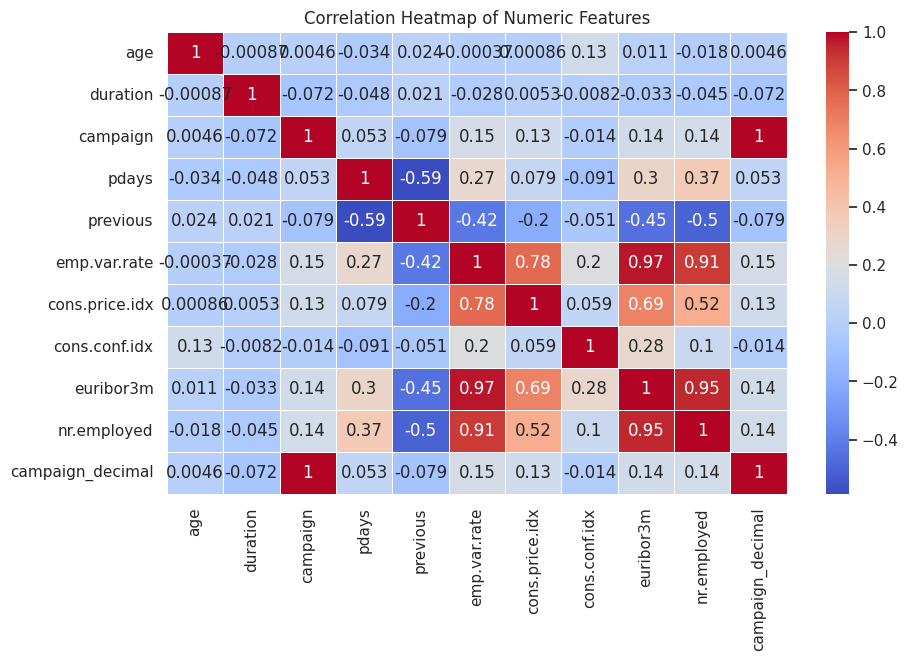

Univariate Analysis - Histogram of 'age':


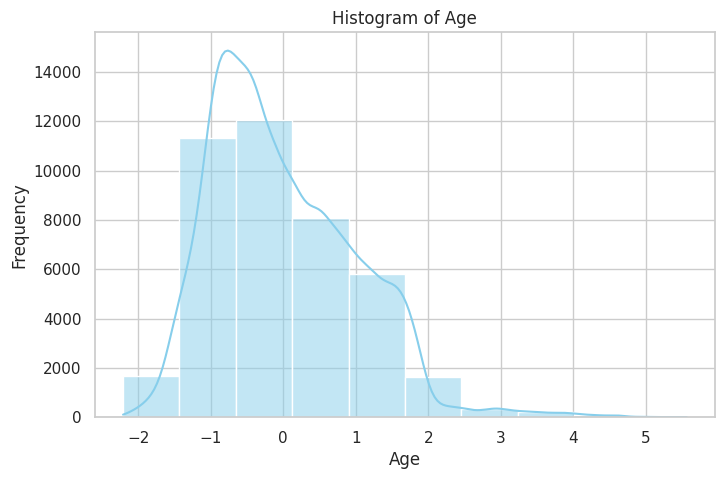

Bivariate Analysis - Scatter plot between 'age' and 'campaign':


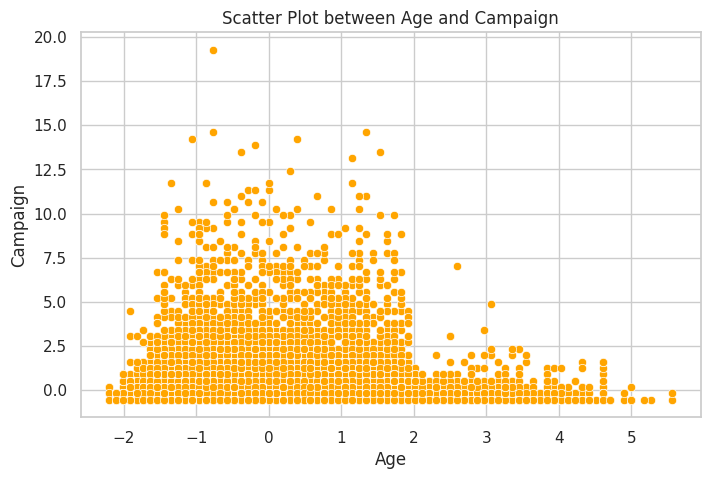

Bivariate Analysis - Pairplot:


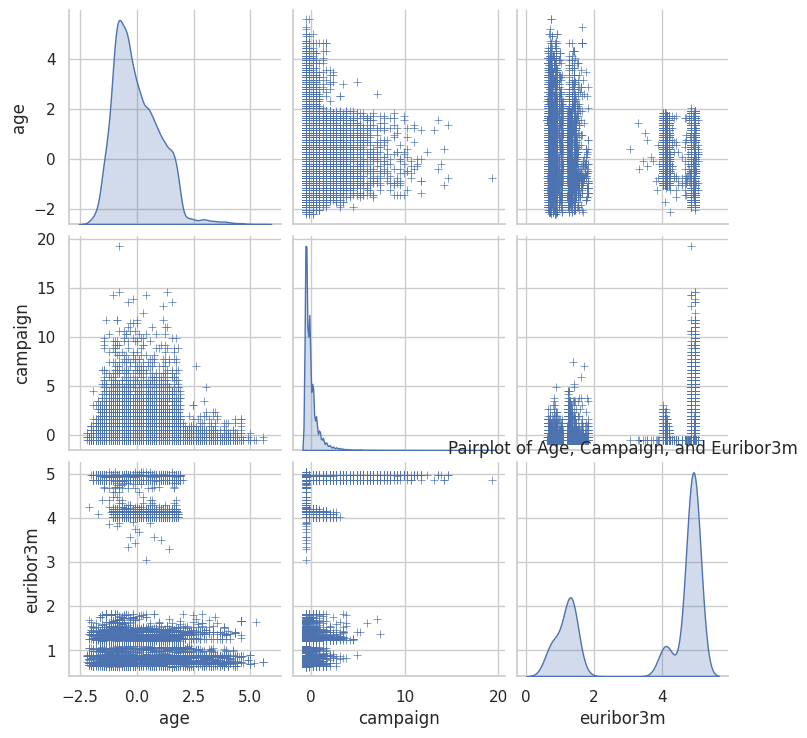

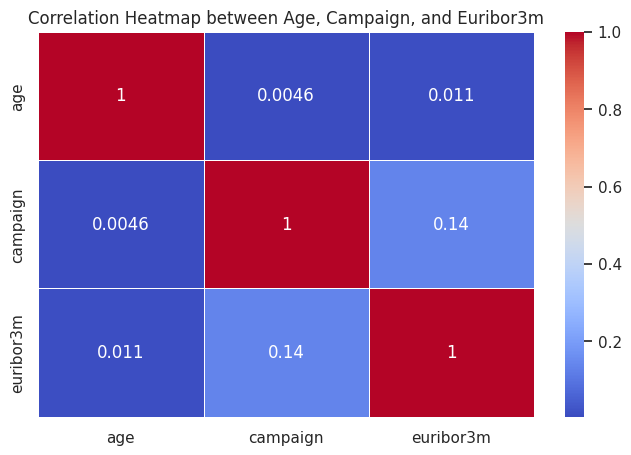

Time Series Visualization of 'campaign':


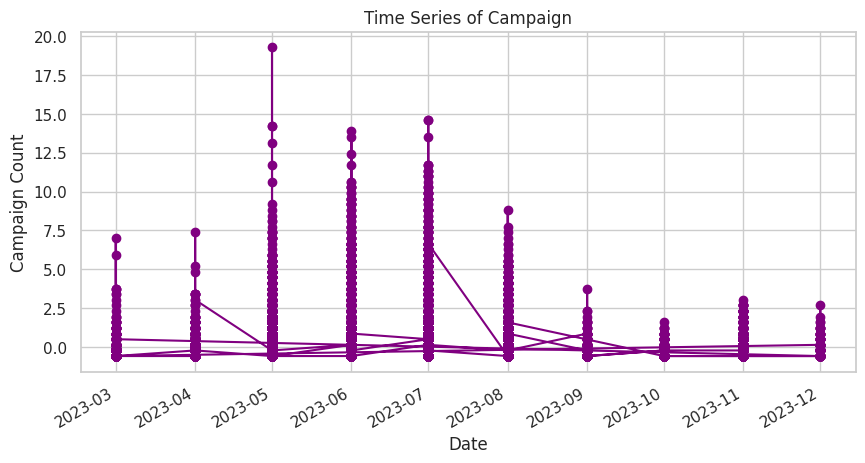

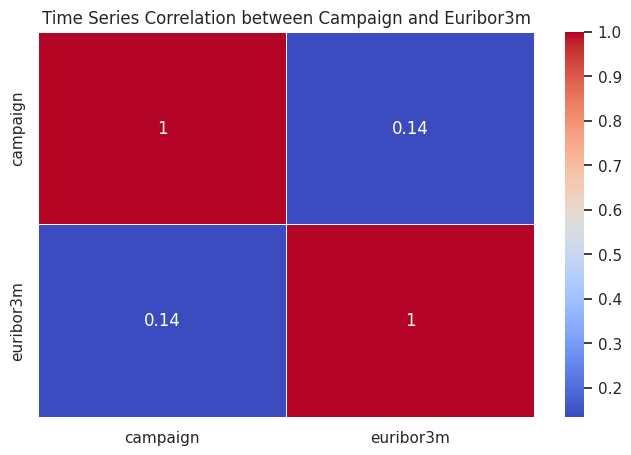

Mean values for numeric columns:
 age                -3.448516e-16
duration            2.582850e+02
campaign           -1.090276e-16
pdays               9.624755e+02
previous            1.729630e-01
emp.var.rate        8.188550e-02
cons.price.idx      9.357566e+01
cons.conf.idx      -4.050260e+01
euribor3m           3.621291e+00
nr.employed         5.167036e+03
campaign_decimal   -1.088982e-18
dtype: float64 

Median values for numeric columns:
 age                   -0.194227
duration             180.000000
campaign              -0.204909
pdays                999.000000
previous               0.000000
emp.var.rate           1.100000
cons.price.idx        93.749000
cons.conf.idx        -41.800000
euribor3m              4.857000
nr.employed         5191.000000
campaign_decimal      -0.002049
dtype: float64 

Mode values for numeric columns:
 age                   -0.865939
duration              85.000000
campaign              -0.565922
pdays                999.000000
previous           

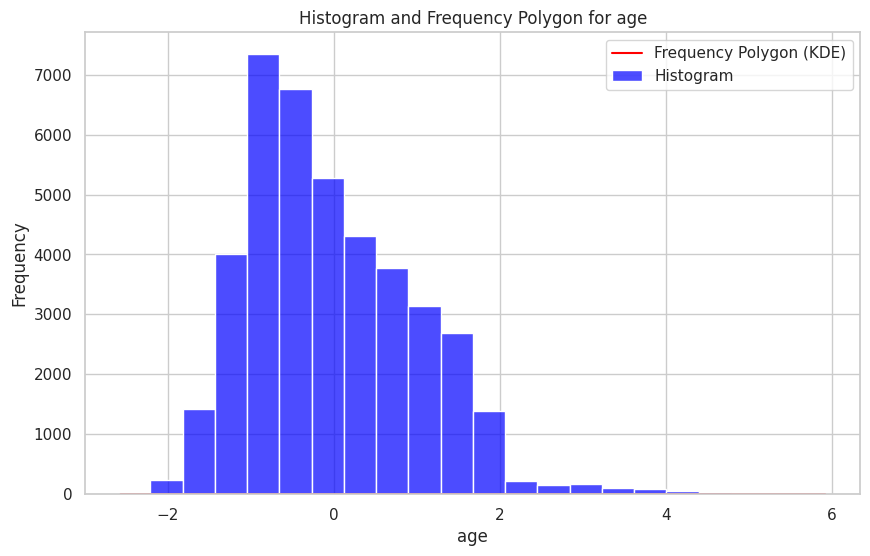

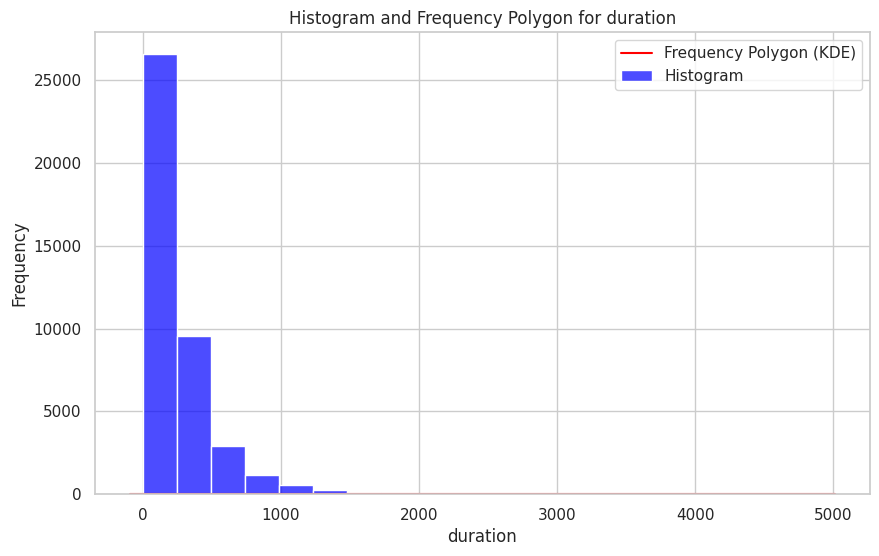

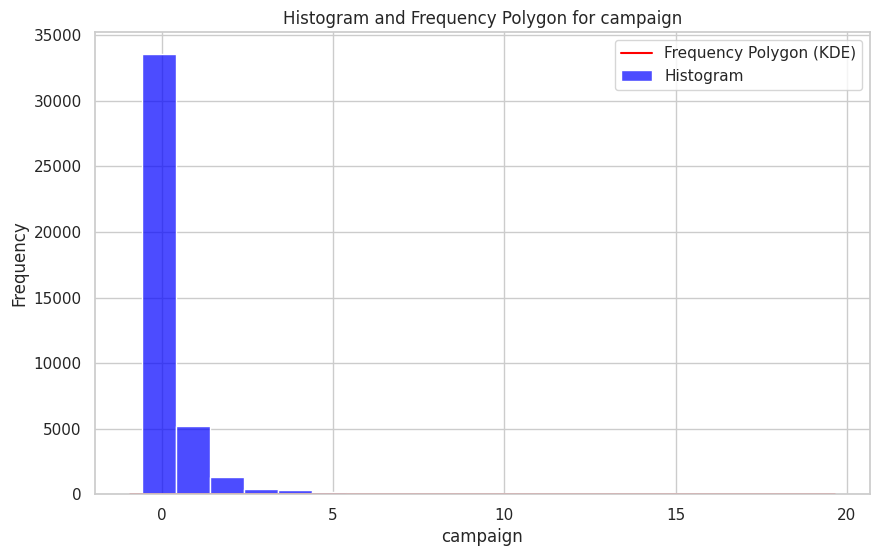

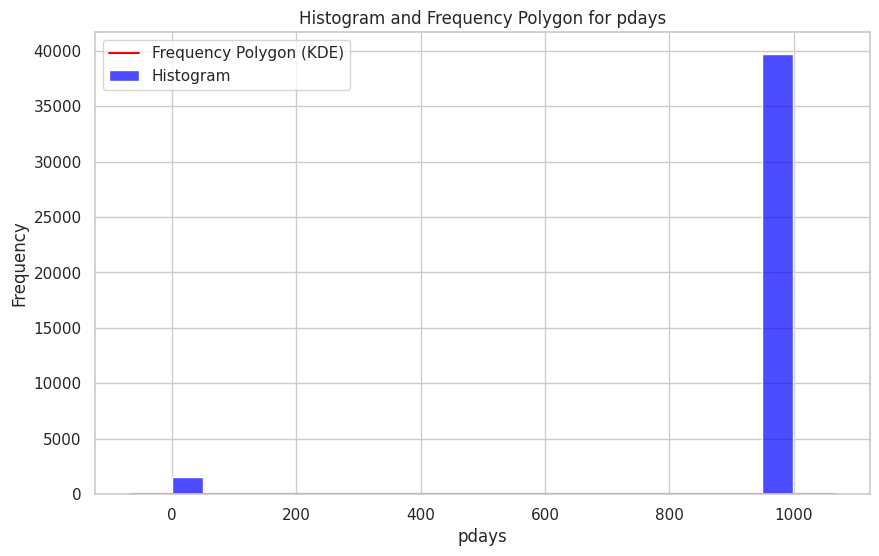

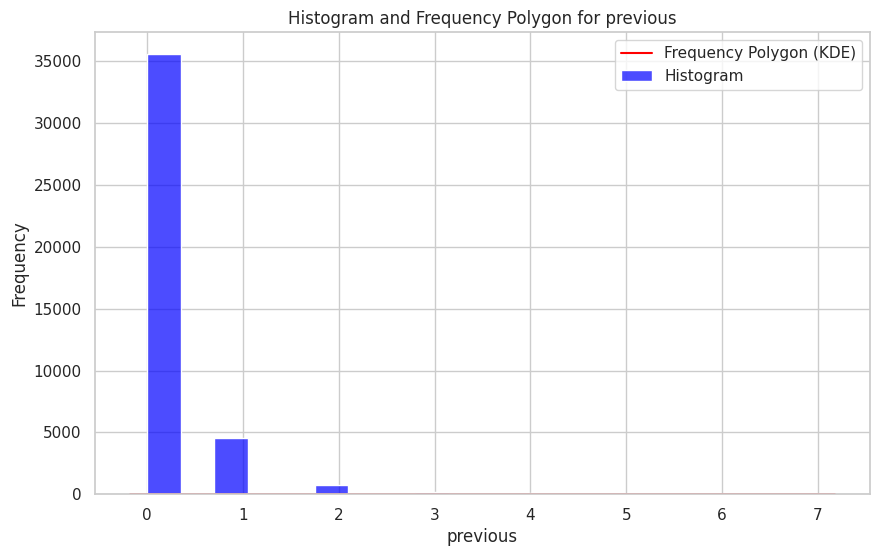

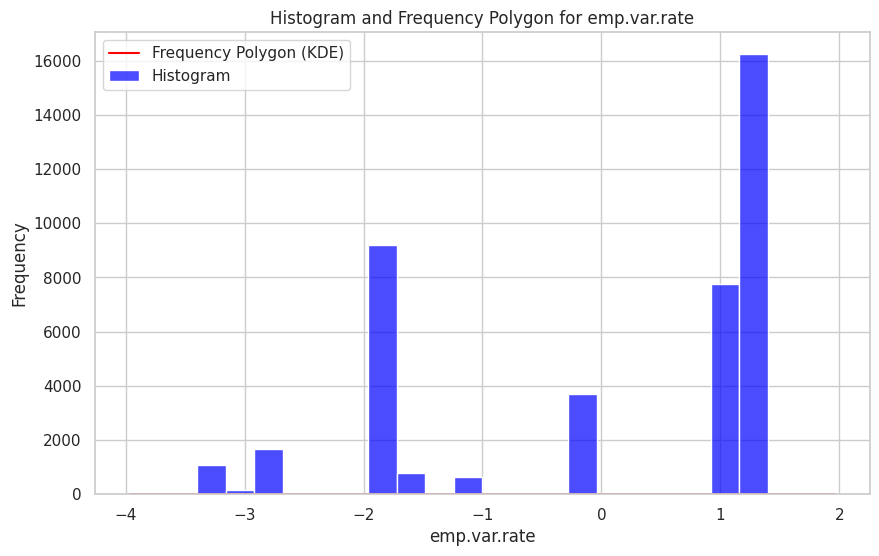

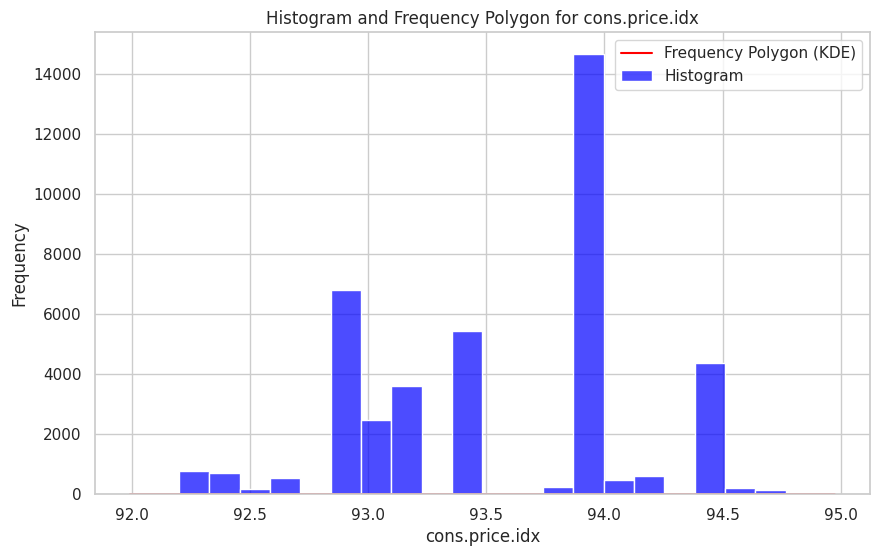

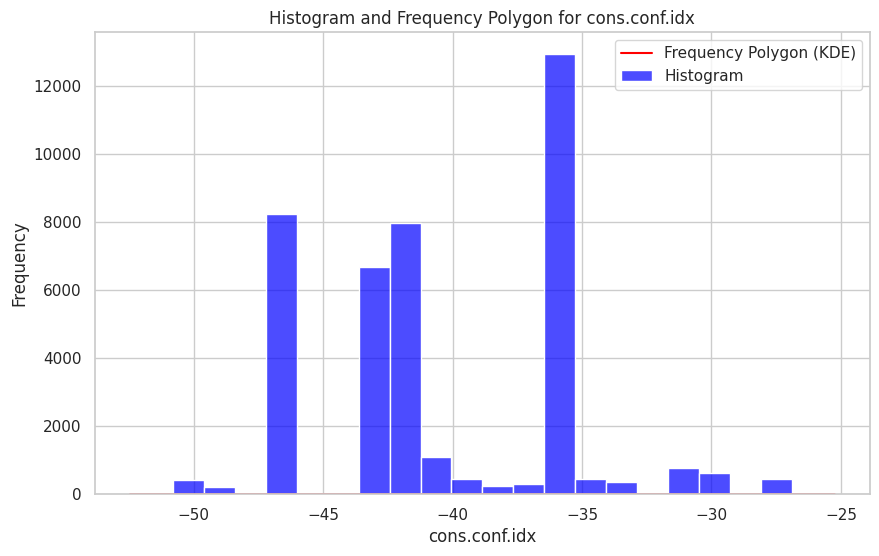

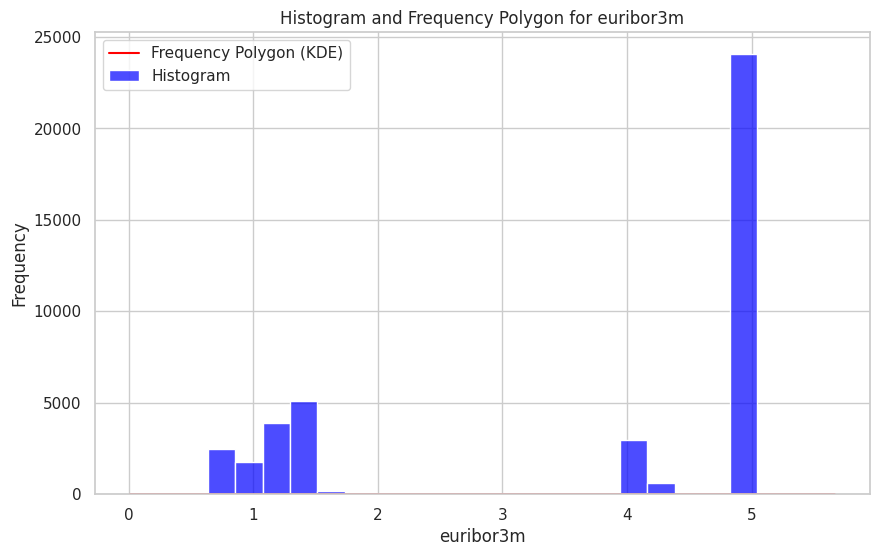

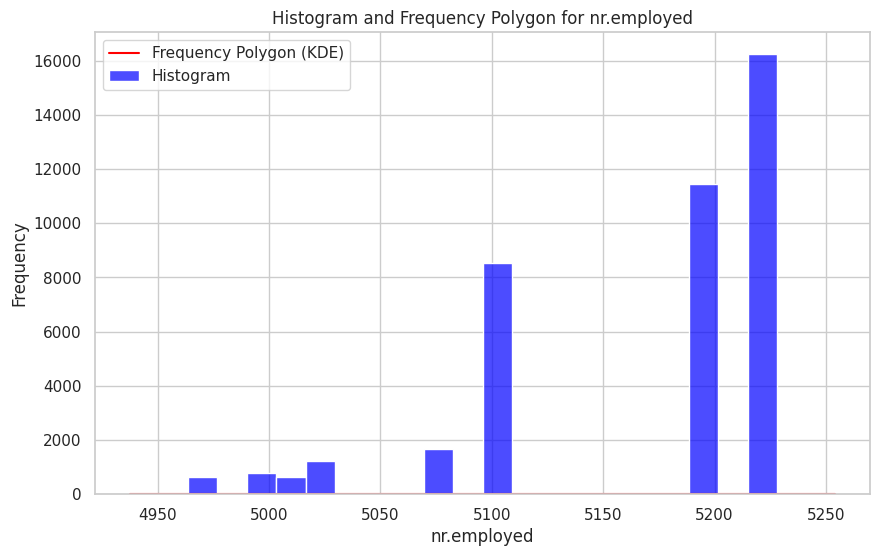

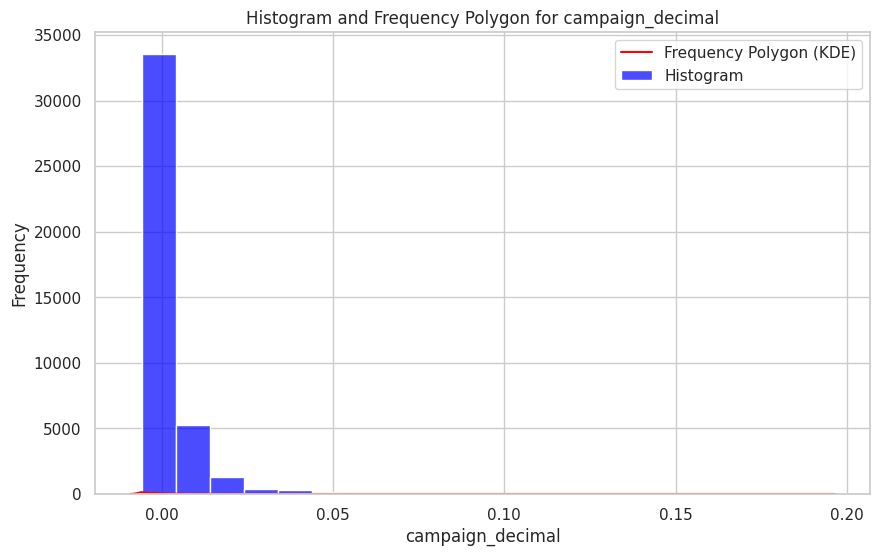

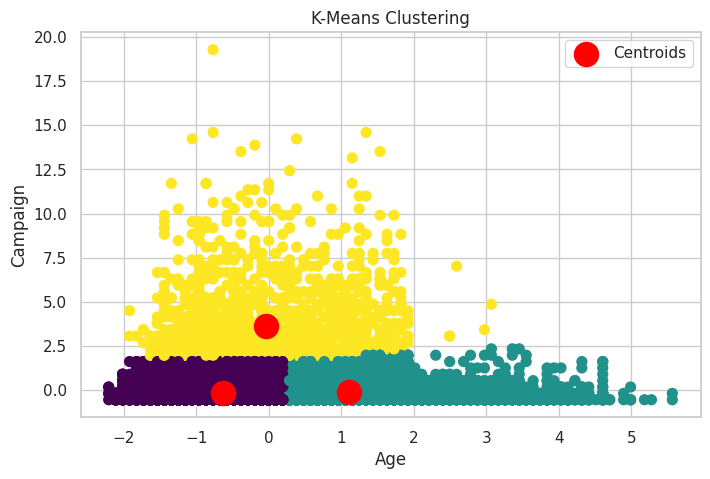

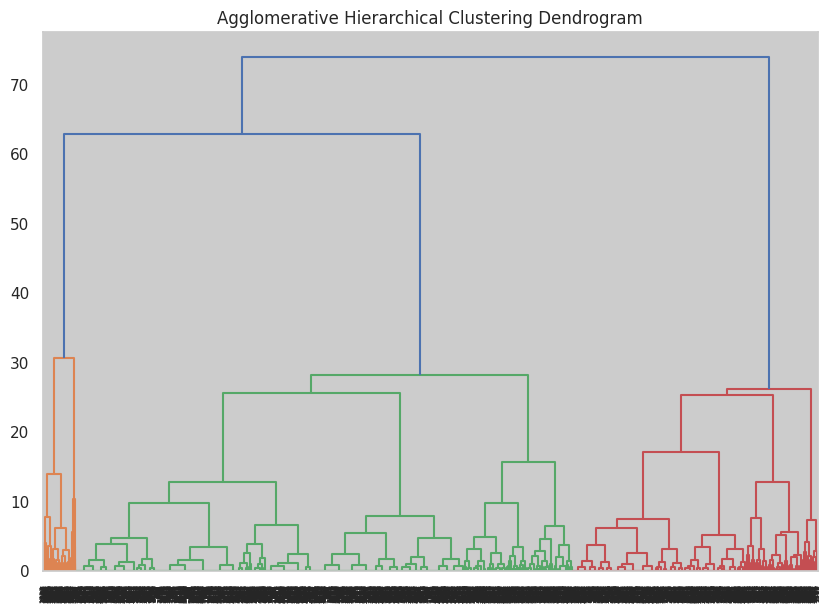

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


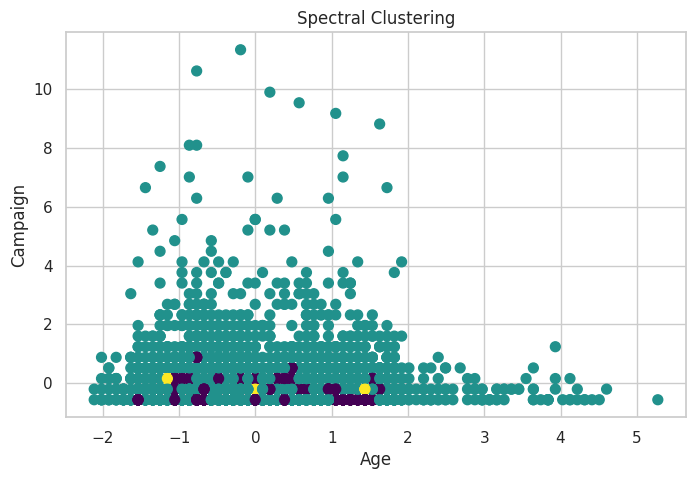

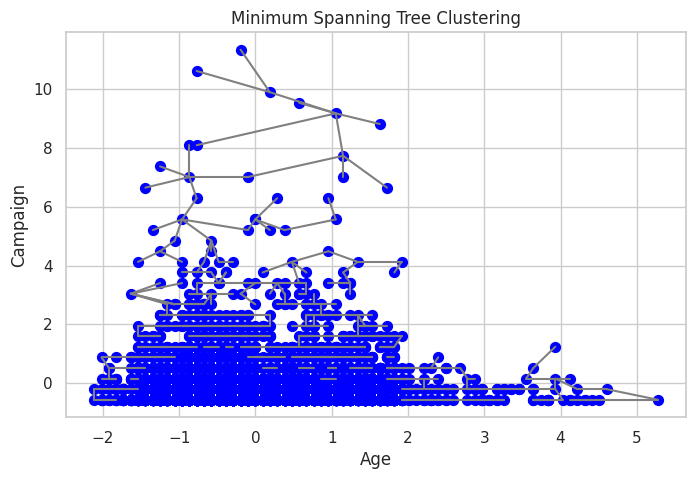

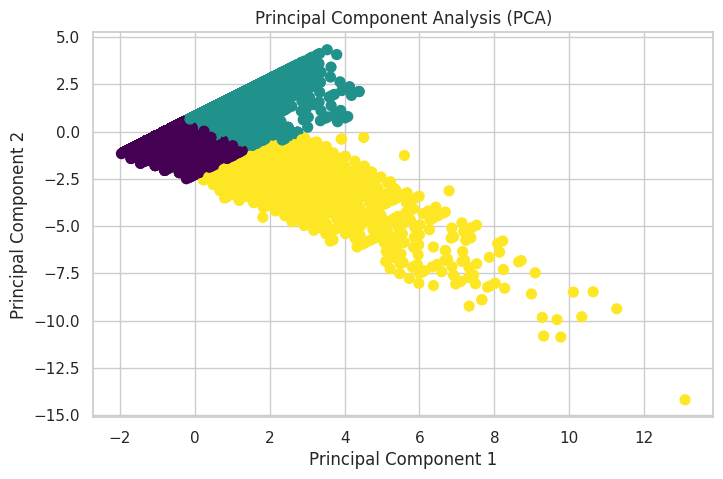

Explained Variance Ratio: [0.50229679 0.49770321]


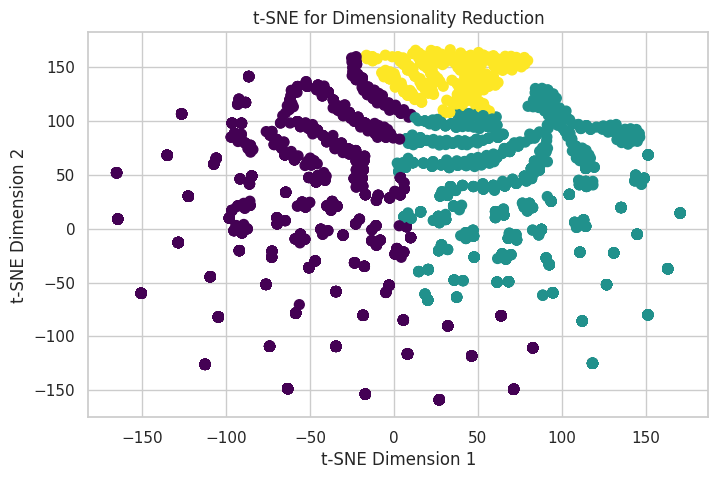

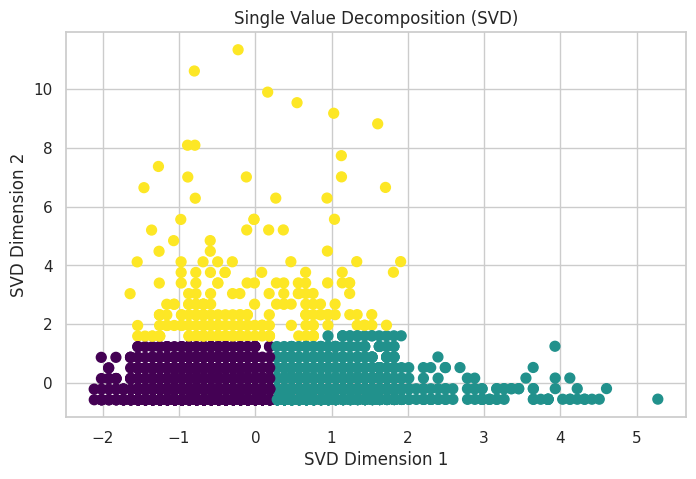

Explained Variance Ratio: [0.52709518 0.47290482]


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv'
bank_data = pd.read_csv(url, sep=';')

print(bank_data.head())

print("Dimensions of the dataset:", bank_data.shape)

print(bank_data.describe(include='all'))

bank_data.info()


# Discretization and Binning
# Discretize 'age' into bins
bank_data['age_bins'] = pd.cut(bank_data['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20s', '30s', '40s', '50s', '60s'])
print("Data after discretizing 'age' into bins:\n", bank_data[['age', 'age_bins']].head(20), "\n")

# Outlier Detection and Filtering
# Z-score for detecting outliers
numeric_cols = ['age', 'campaign', 'euribor3m']

# Calculate z-scores for age, campaign , euribor3m
bank_data_zscore = bank_data[numeric_cols].apply(stats.zscore).abs()
print("Z-scores for selected numeric columns:\n", bank_data_zscore.head(), "\n")

# Detect rows where any z-score in these 3 columns is greater than 3
bank_data_outliers = bank_data[(bank_data_zscore > 3).any(axis=1)]
print("Outliers detected in the numeric columns:\n", bank_data_outliers.head(), "\n")

# 6. Permutation and Random Sampling
# Random sample of 10% of the data
sample_bank_data= bank_data.sample(frac=0.1)
print("Random 10% sample of the data:\n", sample_bank_data.head(), "\n")

# 7. Computing Indicators / Dummy Variables
bank_data_dummy = pd.get_dummies(bank_data, columns=['job', 'marital'], drop_first=True)
print("Data after converting 'job' and 'marital' to dummy variables:\n", bank_data_dummy.head(7), "\n")

# 8. Normalization
# Min-Max Normalization
scaler_min_max = MinMaxScaler()
bank_data[['age', 'campaign']] = scaler_min_max.fit_transform(bank_data[['age', 'campaign']])
print("Data after Min-Max normalization of 'age' and 'campaign':\n", bank_data[['age', 'campaign']].head(7), "\n")

# Z-score Normalization
scaler_z = StandardScaler()
bank_data[['age', 'campaign']] = scaler_z.fit_transform(bank_data[['age', 'campaign']])
print("Data after Z-score normalization of 'age' and 'campaign':\n", bank_data[['age', 'campaign']].head(), "\n")

# Decimal scaling normalization
bank_data['campaign_decimal'] = bank_data['campaign'] / 10**np.ceil(np.log10(bank_data['campaign'].abs().max()))
print("Data after Decimal scaling of 'campaign':\n", bank_data[['campaign', 'campaign_decimal']].head(), "\n")

# filtering numeric data
numeric = bank_data.select_dtypes(include=[np.number])
# Correlation matrix of numeric data only
correlation_mat = numeric.corr()
print("Correlation matrix:\n", correlation_mat, "\n")

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

sns.set(style="whitegrid")

# Types of Analysis
# Univariate Analysis: Histogram of 'age'
plt.figure(figsize=(8, 5))
print("Univariate Analysis - Histogram of 'age':")
sns.histplot(bank_data['age'], bins=10, color='skyblue', kde=True)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Bivariate Analysis: Scatter plot between 'age' and 'campaign'
plt.figure(figsize=(8, 5))
print("Bivariate Analysis - Scatter plot between 'age' and 'campaign':")
sns.scatterplot(x=bank_data['age'], y=bank_data['campaign'], color='orange')
plt.title("Scatter Plot between Age and Campaign")
plt.xlabel("Age")
plt.ylabel("Campaign")
plt.grid(True)
plt.show()

# Pairplot for 'age', 'campaign', and 'euribor3m'
print("Bivariate Analysis - Pairplot:")
sns.pairplot(bank_data[['age', 'campaign', 'euribor3m']], diag_kind="kde", markers='+')
plt.title("Pairplot of Age, Campaign, and Euribor3m")
plt.grid(True)
plt.show()


# Multivariate Analysis: Correlation Heatmap
correlation_matrix = bank_data[['age', 'campaign', 'euribor3m']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap between Age, Campaign, and Euribor3m")
plt.show()



# Time Series Analysis
bank_data['date'] = pd.to_datetime(bank_data['month'] + ' 01 2023', format='%b %d %Y')  # %b for abbreviated month

# Set the date as the index for time series analysis
bank_data.set_index('date', inplace=True)

# Time Series Visualization of 'campaign'
# Convert the 'campaign' column to numeric
plt.figure(figsize=(10, 5))
print("Time Series Visualization of 'campaign':")
bank_data['campaign'].plot(color='purple', linestyle='-', marker='o')
plt.title("Time Series of Campaign")
plt.xlabel("Date")
plt.ylabel("Campaign Count")
plt.grid(True)
plt.show()



# Time Series Correlation between 'campaign' and 'euribor3m'
time_series_corr = bank_data[['campaign', 'euribor3m']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(time_series_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Time Series Correlation between Campaign and Euribor3m")
plt.show()

# Selecting only numeric columns (float64 and int64)
numeric_cols = bank_data.select_dtypes(include=['float64', 'int64'])

# Calculating mean, median, and mode for numeric columns
print("Mean values for numeric columns:\n", numeric_cols.mean(), "\n")
print("Median values for numeric columns:\n", numeric_cols.median(), "\n")
print("Mode values for numeric columns:\n", numeric_cols.mode().iloc[0], "\n")

print("Quantiles (25%, 50%, 75%) for numeric columns:\n", numeric_cols.quantile([0.25, 0.50, 0.75]), "\n")

# Calculate additional summary statistics (min, max, standard deviation)
print("Min values for numeric columns:\n", numeric_cols.min(), "\n")
print("Max values for numeric columns:\n", numeric_cols.max(), "\n")
print("Standard deviation for numeric columns:\n", numeric_cols.std(), "\n")

# Summary statistics for all numeric columns (including count, mean, std, etc.)
print("Summary statistics for numeric columns:\n", numeric_cols.describe(), "\n")


# Measures of Dispersion
print("Variance for numeric columns:\n", numeric_cols.var(), "\n")
print("Standard Deviation for numeric columns:\n", numeric_cols.std(), "\n")
print("Range for numeric columns:\n", numeric_cols.max() - numeric_cols.min(), "\n")

# Interquartile Range (IQR)
print("Interquartile Range (IQR) for numeric columns:\n", numeric_cols.quantile(0.75) - numeric_cols.quantile(0.25), "\n")

# Skewness and Kurtosis
print("Skewness for numeric columns:\n", numeric_cols.skew(), "\n")
print("Kurtosis for numeric columns:\n", numeric_cols.kurt(), "\n")

# Frequency Distribution
for column in numeric_cols.columns:
    print(f"Frequency distribution for {column}:\n")
    print(numeric_cols[column].value_counts().sort_index(), "\n")

# Histogram and Frequency Polygon
for column in numeric_cols.columns:
    plt.figure(figsize=(10, 6))

    # Histogram
    sns.histplot(numeric_cols[column], kde=False, bins=20, color='blue', label='Histogram', alpha=0.7)

    # Frequency Polygon (Kernel Density Estimation)
    sns.kdeplot(numeric_cols[column], color='red', label='Frequency Polygon (KDE)')

    plt.title(f"Histogram and Frequency Polygon for {column}")
    plt.legend()
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Selecting two features for simplicity
X = bank_data[['age', 'campaign']]

# # Using a smaller subset of the data for testing
X_subset = X.sample(frac=0.1, random_state=500)

# # K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plotting K-Means Clustering
plt.figure(figsize=(8, 5))
plt.scatter(X['age'], X['campaign'], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Age")
plt.ylabel("Campaign")
plt.legend()
plt.show()



# Agglomerative Clustering with Dendrogram
linked = linkage(X_subset, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Agglomerative Hierarchical Clustering Dendrogram")
plt.show()

# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_subset)

# Plotting Spectral Clustering
plt.figure(figsize=(8, 5))
plt.scatter(X_subset['age'], X_subset['campaign'], c=spectral_labels, cmap='viridis', s=50)
plt.title("Spectral Clustering")
plt.xlabel("Age")
plt.ylabel("Campaign")
plt.show()


# Create adjacency graph based on K-Nearest Neighbors
adj_matrix = kneighbors_graph(X_subset, n_neighbors=5, include_self=False)

# Create Minimum Spanning Tree
mst_matrix = minimum_spanning_tree(adj_matrix).toarray()

# Plot MST as a scatter plot with lines
plt.figure(figsize=(8, 5))
plt.scatter(X_subset['age'], X_subset['campaign'], c='blue', s=50)
for i in range(len(mst_matrix)):
    for j in range(len(mst_matrix)):
        if mst_matrix[i, j] > 0:
            plt.plot([X_subset['age'].iloc[i], X_subset['age'].iloc[j]], [X_subset['campaign'].iloc[i], X_subset['campaign'].iloc[j]], 'grey')
plt.title("Minimum Spanning Tree Clustering")
plt.xlabel("Age")
plt.ylabel("Campaign")
plt.show()


# # MDS transformation
# mds = MDS(n_components=2, random_state=42)
# mds_transformed = mds.fit_transform(X_subset)

# # Plotting MDS
# plt.figure(figsize=(8, 5))
# plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c=kmeans_labels, cmap='viridis', s=50)
# plt.title("Multidimensional Scaling (MDS)")
# plt.xlabel("MDS Dimension 1")
# plt.ylabel("MDS Dimension 2")
# plt.show()


# PCA transformation
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)

# Plotting PCA
plt.figure(figsize=(8, 5))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("Principal Component Analysis (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


# # K-Means Clustering
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans_labels2 = kmeans.fit_predict(X_subset)


# t-SNE Transformation
tsne = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne.fit_transform(X_subset)

# Plotting t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=kmeans_labels2, cmap='viridis', s=50)
plt.title("t-SNE for Dimensionality Reduction")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# SVD Transformation
svd = TruncatedSVD(n_components=2, random_state=42)
svd_transformed = svd.fit_transform(X_subset)

# Plotting SVD
plt.figure(figsize=(8, 5))
plt.scatter(svd_transformed[:, 0], svd_transformed[:, 1], c=kmeans_labels2, cmap='viridis', s=50)
plt.title("Single Value Decomposition (SVD)")
plt.xlabel("SVD Dimension 1")
plt.ylabel("SVD Dimension 2")
plt.show()

# Explained variance
print("Explained Variance Ratio:", svd.explained_variance_ratio_)



